In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loadind the data
train = pd.read_csv(r"C:\Users\91844\Desktop\DATA-SCIENCE-master\Python Projects\insurance\train_qnU1GcL.csv")

In [3]:
test = pd.read_csv(r"C:\Users\91844\Desktop\DATA-SCIENCE-master\Python Projects\insurance\test_LxCaReE_DvdCKVT_iU3TGkw.csv")

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [6]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [7]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [9]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [10]:
train.shape, test.shape

((79853, 12), (34224, 11))

In [11]:
# distribution of target variable
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

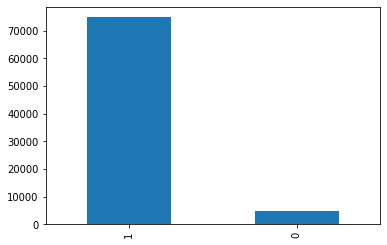

In [12]:
train['target'].value_counts().plot.bar()

In [13]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [14]:
train.fillna(0,inplace=True)

In [15]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [16]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [17]:
test.fillna(0,inplace=True)

In [18]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

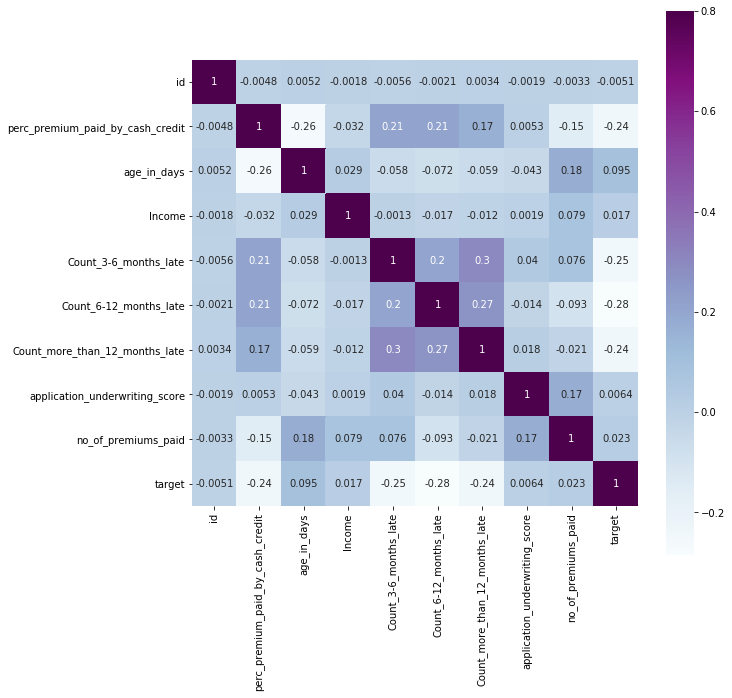

In [19]:
matrix = train.corr()
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
# annot = True to print the values inside the square
sns.heatmap(matrix,vmax=.8, square=True, annot=True, cmap="BuPu");

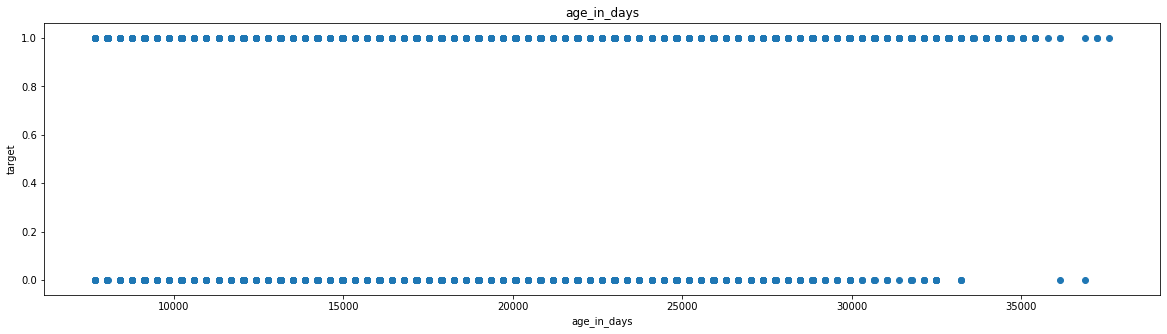

In [20]:
# Scatter plot of our target variable with respect to age_in_date
plt.figure(figsize=(20, 5))

features = ['age_in_days']
Target = train['target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = train[col]
    y = Target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')

In [21]:
X = train.drop('target',1)
Y = train.target

In [22]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(63882, 16)
(15971, 16)
(63882,)
(15971,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [27]:
l_model = LogisticRegression()
l_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# model evaluation for training set
y_test_predict = l_model.predict(X_test)

In [29]:
# defining a function which will return the rmsle score
def rmsle(y, y_pred):
    assert len(y)== len(y_pred)
    #terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y))**2))

In [30]:
rmsle(Y_test,y_test_predict)

0.17679386080056073

In [31]:
l_model.score(X_train,Y_train)

0.9380263611032842

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
# defining a decision tree model with a depth of 5. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=7,min_samples_leaf=4)

In [34]:
dt_reg.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [35]:
predict = dt_reg.predict(X_test)

In [36]:
# calculating rmsle of the predicted values
rmsle(Y_test, predict)

0.15831003181808773

In [37]:
test_prediction = dt_reg.predict(test)

In [38]:
test=pd.get_dummies(test)

In [39]:
submission=pd.read_csv(r"C:\Users\91844\Desktop\DATA-SCIENCE-master\Python Projects\insurance\sample_submission_ger7W7I.csv")

In [40]:
submission['target']=test_prediction
submission['id']=test_original['id']

In [41]:
pd.DataFrame(submission, columns=['id','target']).to_csv('Last.csv', index = False)

In [42]:
dt_reg.score(X_train, Y_train)

0.19591555986074427